In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [ ]:
#train = train.set_index(train['row_id'])
train.drop('row_id', axis=1, inplace=True)
train.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0


In [ ]:
#test = test.set_index(test['row_id'])
#test.drop('row_id', axis=1, inplace=True)
test.drop('grass_date', axis=1, inplace=True)
test.head()

,country_code,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4


In [ ]:
test = test.drop(['user_id','country_code','subject_line_length'],axis=1)

In [ ]:
train = train.drop(['user_id','country_code','subject_line_length'],axis=1)

In [ ]:
test['last_open_day'] = test['last_open_day'].replace(['Never open'],'0')
test['last_login_day'] = test['last_login_day'].replace(['Never login'],'0')
test['last_checkout_day'] = test['last_checkout_day'].replace(['Never checkout'],'0')

In [ ]:
train['last_open_day'] = train['last_open_day'].replace(['Never open'],'0')
train['last_login_day'] = train['last_login_day'].replace(['Never login'],'0')
train['last_checkout_day'] = train['last_checkout_day'].replace(['Never checkout'],'0')

In [ ]:
test["last_open_day"] = test["last_checkout_day"].astype(str).astype(int)
test["last_login_day"] = test["last_checkout_day"].astype(str).astype(int)
test["last_checkout_day"] = test["last_checkout_day"].astype(str).astype(int)
print(test.dtypes)

last_open_day                  int64
last_login_day                 int64
last_checkout_day              int64
open_count_last_10_days        int64
open_count_last_30_days        int64
open_count_last_60_days        int64
login_count_last_10_days       int64
login_count_last_30_days       int64
login_count_last_60_days       int64
checkout_count_last_10_days    int64
checkout_count_last_30_days    int64
checkout_count_last_60_days    int64
row_id                         int64
dtype: object


In [ ]:
train["last_open_day"] = train["last_checkout_day"].astype(str).astype(int)
train["last_login_day"] = train["last_checkout_day"].astype(str).astype(int)
train["last_checkout_day"] = train["last_checkout_day"].astype(str).astype(int)
print(train.dtypes)

grass_date                     object
last_open_day                   int64
last_login_day                  int64
last_checkout_day               int64
open_count_last_10_days         int64
open_count_last_30_days         int64
open_count_last_60_days         int64
login_count_last_10_days        int64
login_count_last_30_days        int64
login_count_last_60_days        int64
checkout_count_last_10_days     int64
checkout_count_last_30_days     int64
checkout_count_last_60_days     int64
open_flag                       int64
dtype: object


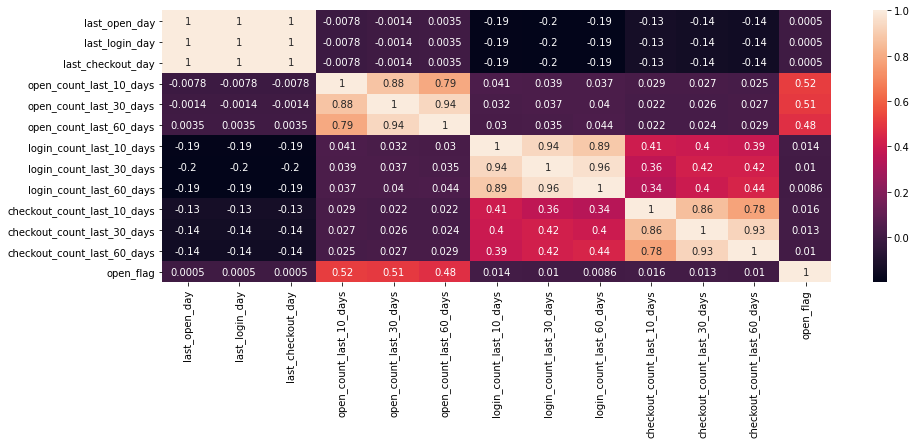

In [ ]:
sns.heatmap(data=train.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(15,5)

In [ ]:
train.describe()

,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,56.716191,56.716191,56.716191,0.911829,2.780457,5.019364,8.382287,25.284053,49.010430,0.909898,2.796040,5.420960,0.155781
std,117.721606,117.721606,117.721606,1.754052,4.570239,7.902313,13.424436,37.853189,71.819327,2.887416,7.686064,13.980182,0.362650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,12.000000,12.000000,0.000000,1.000000,2.000000,3.000000,11.000000,22.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,51.000000,51.000000,1.000000,3.000000,6.000000,12.000000,35.000000,69.000000,1.000000,3.000000,6.000000,0.000000
max,1445.000000,1445.000000,1445.000000,31.000000,92.000000,135.000000,254.000000,735.000000,1260.000000,157.000000,531.000000,783.000000,1.000000


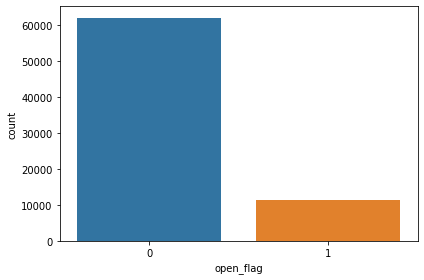

In [ ]:
sns.countplot(data=train,x='open_flag')
plt.tight_layout()

In [ ]:
# X = data feature
x_train = train.drop(['last_open_day', 'last_login_day',
       'last_checkout_day', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days','open_flag','grass_date'],axis=1)
y_train = train['open_flag']
x_test = test[['open_count_last_10_days','open_count_last_30_days','open_count_last_60_days']]
# y = data target
#Y = train['open_flag']

In [ ]:
x_test.head()

,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days
0,2,3,4
1,1,1,1
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
y_train.fillna(train['open_flag'].mean(), inplace=True)
x_train['open_count_last_10_days'].fillna(train['open_count_last_10_days'].mean(), inplace=True)
x_train['open_count_last_30_days'].fillna(train['open_count_last_30_days'].mean(), inplace=True)
x_train['open_count_last_60_days'].fillna(train['open_count_last_60_days'].mean(), inplace=True)

In [ ]:
x_train.shape

(54466, 3)

In [ ]:
# count the empty values in each column
y_train.isna().sum()

0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

87.52

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

87.61

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

86.84

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
acc_rf = round(random_forest.score(x_train,y_train)*100,2)
acc_rf

88.84

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

88.84

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN',  
              'Random Forest','Decision Tree'],
    'Score': [acc_log, acc_svc, acc_knn,  
              acc_rf, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.84
4,Decision Tree,88.84
1,Support Vector Machines,87.61
0,Logistic Regression,87.52
2,KNN,86.84


In [ ]:
submission = pd.DataFrame({
        "raw_id": test["row_id"],
        "pred": y_pred
    })
submission.head()
#submission.to_excel('/content/submission.xlsx')

,raw_id,pred
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


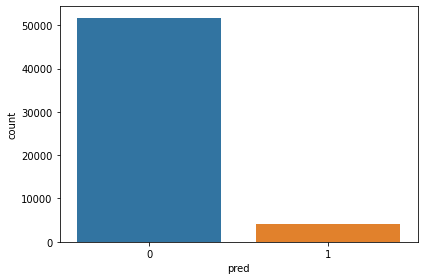

In [ ]:
sns.countplot(data=submission,x='pred')
plt.tight_layout()

In [ ]:
submission['pred'].value_counts()

0    51751
1     4219
Name: pred, dtype: int64